In [2]:
import numpy as np
import glob
import os

# 1. Zip dosyasını açma
zip_file_name = "/content/fruits-360_dataset_100x100.zip"  # ZIP dosyanızın yolu
extract_path = "/content/fruits-360_dataset"      # Çıkartılacak hedef klasör

import zipfile
if not os.path.exists(extract_path):  # Daha önce açılmadıysa
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"{zip_file_name} dosyası açıldı.")

# 2. Veri yolu tanımları
base_path = os.path.join(extract_path, "fruits-360_dataset_100x100/fruits-360/")
dim = 100  # Resim boyutu

/content/fruits-360_dataset_100x100.zip dosyası açıldı.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 141)                 │          18,189 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,749,965 (6.68 MB)

 Trainable params: 1,749,965 (6.68 MB)

 Non-trainable params: 0 (0.00 B)

Found 70491 images belonging to 141 classes.
Found 23619 images belonging to 141 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1102/1102 ━━━━━━━━━━━━━━━━━━━━ 252s 222ms/step - accuracy: 0.1864 - loss: 3.3469 - val_accuracy: 0.7968 - val_loss: 0.6717 - learning_rate: 0.0010
Epoch 2/30
1102/1102 ━━━━━━━━━━━━━━━━━━━━ 248s 223ms/step - accuracy: 0.6353 - loss: 1.0849 - val_accuracy: 0.8968 - val_loss: 0.3567 - learning_rate: 0.0010
Epoch 3/30
1102/1102 ━━━━━━━━━━━━━━━━━━━━ 259s 221ms/step - accuracy: 0.7154 - loss: 0.8375 - val_accuracy: 0.9135 - val_loss: 0.2991 - learning_rate: 0.0010
Epoch 4/30
1102/1102 ━━━━━━━━━━━━━━━━━━━━ 244s 221ms/step - accuracy: 0.7582 - loss: 0.6968 - val_accuracy: 0.9368 - val_loss: 0.2216 - learning_rate: 0.0010
Epoch 5/30
1102/1102 ━━━━━━━━━━━━━━━━━━━━ 245s 222ms/step - accuracy: 0.7905 - loss: 0.6091 - val_accuracy: 0.9363 - val_loss: 0.2233 - learning_rate: 0.0010
Epoch 6/30
1102/1102 ━━━━━━━━━━━━━━━━━━━━ 239s 216ms/step - accuracy: 0.8108 - loss: 0.5450 - val_accuracy: 0.9557 - val_loss: 0.1700 - learning_rate: 0.0010
Epoch 7/30
1102/1102 ━━━━━━━━━━━━━━━━━━━━ 239s 216ms/step - acc

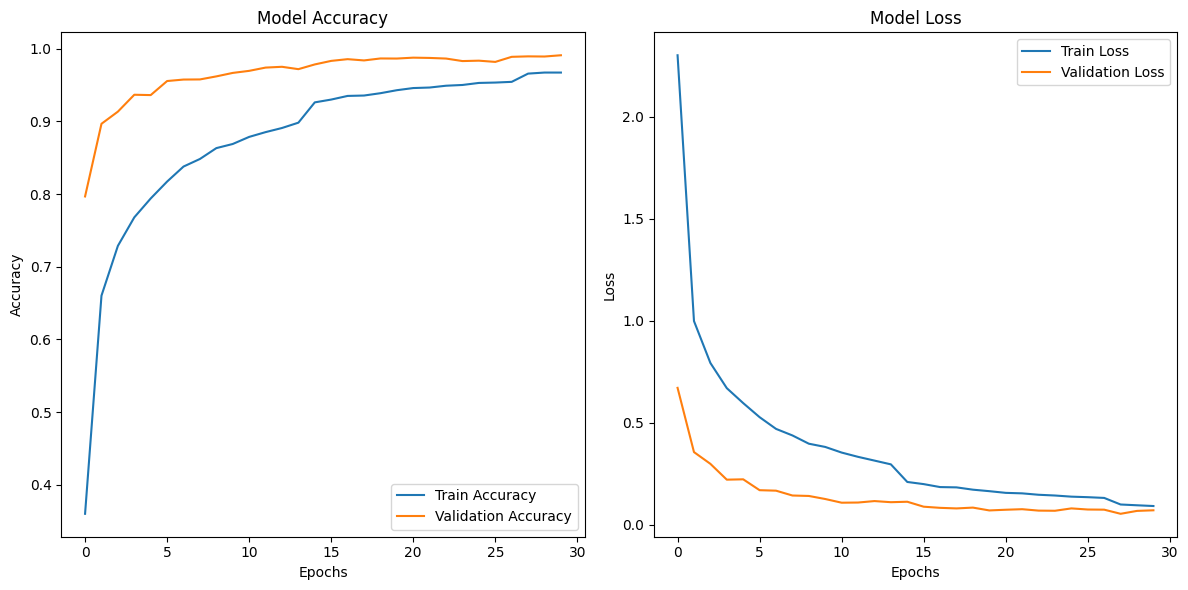

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Parametreler
input_shape = (100, 100, 3)
num_classes = 141
train_dir = "/content/fruits-360_dataset/fruits-360_dataset_100x100/fruits-360/Training"
test_dir = "/content/fruits-360_dataset/fruits-360_dataset_100x100/fruits-360/Test"

# Basit bir CNN modeli oluşturma
def build_basic_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Modeli oluştur ve özetle
model = build_basic_cnn(input_shape, num_classes)
model.summary()

# ImageDataGenerator ile veri artırma ve yeniden ölçeklendirme
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,  # Veri artırma için
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Veri akışını oluşturma
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=64,  # Daha küçük batch size RAM için uygun olabilir
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=64,
    class_mode='sparse'
)

# Callback'ler: EarlyStopping ve Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Modeli eğitme
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=30,
    callbacks=[early_stopping, reduce_lr]
)

# Eğitim ve doğrulama sonuçlarını görselleştirme
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Doğruluk grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Kayıp grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
# Modeli kaydetme
model_save_path = "/content/fruits_cnn_model.keras"
model.save(model_save_path)

print(f"Model başarıyla {model_save_path} konumuna kaydedildi.")

Model başarıyla /content/fruits_cnn_model.keras konumuna kaydedildi.


In [10]:
from tensorflow.keras.models import Sequential, load_model

# Modeli tekrar yükleme ve test setinde değerlendirme
loaded_model = load_model(model_save_path)
test_loss, test_accuracy = loaded_model.evaluate(test_generator)

print(f"Yüklenen modelin Test Loss: {test_loss:.4f}")
print(f"Yüklenen modelin Test Accuracy: {test_accuracy:.4f}")

370/370 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9888 - loss: 0.0628
Yüklenen modelin Test Loss: 0.0543
Yüklenen modelin Test Accuracy: 0.9896
